# Channel corrections (chromatic shift, compensation, offset)
Last update: 2022-03-11<br>
version 1.0.2

Code under GNU General Public License v3 (see `LICENSE` file). <br>
Contact: A. Coulon antoine.coulon@curie.fr – Institut Curie, CNRS. 2022

In [1]:
from scipy import *
from numpy import *
from matplotlib import pyplot as plt
from skimage import *
import os, sys
#import time
import datetime
import sys; sys.path.append('../'); import locFiles as lf

In [2]:
## Raw data directory
dirIn='/Users/acoulon/CoulonLab/data/Kyra/20220120/20220120_neos_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1/'

## Destination of the corrected images
dirOut=dirIn[:-1]+'_corr/'

# Chromatic shit correction matrices
CCMs=lf.imp.load_source('m', 'chromaticCorr_20210104.py').chromaticCorrMatrices['microscope2_60x_dz0.3um']
rawCCMs=[None, CCMs['o5-CAL610 => o5-Q570'], CCMs['o5-Q670 => o5-Q570'], CCMs['DAPI => o5-Q570']]

# Channel compensation matrix
#   - right vector (columns): [raw channels, offset]
#   - left vector (row):      [compensated channels]
CompM = array([[1.,   -.787, 0.,    0.,    0.   ],
               [0.,   1.,    0.,    0.,    0.   ],
               [0.,   -.522, 1.,    0.,    0.   ],
               [0.,   0.,    0.,    1.,    0.   ],
               ])

# Channels to offset to 0
chToOffset=[True, False, False, False]

###########
prmsToSave=In[-1][:-36]

In [3]:
if not os.path.exists(dirOut): os.mkdir(dirOut)
open(os.path.join(dirOut,'corr_params.txt'),'w').writelines("### Corrected on %s with the following parameters:\n\n%s"%(str(datetime.datetime.now()),prmsToSave))
    
for fn in os.listdir(dirIn):
    if fn[-4:]!='.tif': continue
    
    print("Processing '%s'"%fn)
    
    # Chromatic shift correction on whole field of view
    print("  -> Chromatic shift correction...")
    #fnTmp='./tmp%05d.tif'%random.randint(100000)
    fnTmp=fn[:-4]+'_cc.tif'
    lf.inspectLoc(raw=fn,
                  dirIn=dirIn,
                  dirOut='./',
                  rawCCMs=rawCCMs,
                  maxProj=False,
                  fnTifInspect=fnTmp)
    
    # Channel compensation
    print("  -> Channel compensation...")
    im=io.imread(fnTmp)
    im=im.swapaxes(1,3).swapaxes(2,3) #!!!!
    # /!\ Dimensions should be ZCYX /!\
    imComp=array([sum([im[:,i]*compW[i] if compW[i]!=1. else im[:,i] for i in range(compW.shape[0]-1) if compW[i]!=0],0)+compW[-1]
        for compW in CompM]).swapaxes(0,1)
    os.remove(fnTmp)
    
    # Offset
    print("  -> Offset channels...")
    imComp=imComp.T
    for i,toOffset in enumerate(chToOffset):
        if toOffset: imComp[:,:,i]-=imComp[:,:,i].mean(0).mean(0)
    imComp=imComp.T
    
    # Saving
    print("  -> Saving...")
    io.imsave(os.path.join(dirOut,fn[:-4]+'_corr.tif'),float32(imComp),imagej=True)
    
    print("  Done.")


Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos0.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos1.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos10.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos11.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos12.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos13.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos14.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos15.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos16.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos17.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos18.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos19.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos2.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos3.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos4.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos5.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos6.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos7.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos8.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.
Processing '20220120_neotranscripts_cellline_NG3_FXR1-670_empty-channelCAL610_NG21-570_noDOX_1_MMStack_Pos9.ome.tif'
  -> Chromatic shift correction...


C:\ProgramData\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:3722: UserWarning: invalid JSON 'b'{\n  "encoding": "UTF-8",\n  "format": "Micro-Manager Property Map",\n  "major_version": 2,\n  "minor_version": 0,\n  "map": {\n    "AutoscaleIgnoredQuantile": {\n      "type": "DOUBLE",\n      "scalar": 0.001\n    },\n    "Autostretch": {\n      "type": "BOOLEAN",\n      "scalar": true\n    },\n    "ChannelSettings": {\n      "type": "PROPERTY_MAP",\n      "array": [\n        {\n          "Color": {\n            "type": "COLOR",\n            "scalar": {\n              "ColorSpace": "sRGB",\n              "Components": [\n                1.0,\n                1.0,\n                1.0\n              ],\n              "Alpha": 1.0\n            }\n          },\n          "ComponentSettings": {\n            "type": "PROPERTY_MAP",\n            "array": [\n              {\n                "Gamma": {\n                  "type": "DOUBLE",\n                  "scalar": 1.0\n      

  -> Channel compensation...
  -> Offset channels...
  -> Saving...
  Done.


### To determine compensation matrix

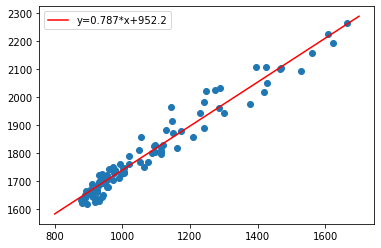

In [4]:
curves=array([loadtxt(fn,skiprows=1,delimiter=',')[:,1] for fn in ['comp_c1.csv','comp_c2.csv','comp_c3.csv','comp_c4.csv']])

cToScale,cTarget=curves[1],curves[0]
#cToScale,cTarget=curves[1],curves[2]

##
slope,offset=polyfit(cToScale,cTarget,1)
plt.figure()
plt.scatter(cToScale,cTarget); x=r_[800,1700]; plt.plot(x,x*slope+offset,c='r',label='y=%.3f*x+%.1f'%(slope,offset))
plt.legend(); plt.show()


In [ ]:
im=io.imread('../20220120_neotranscripts_cellline_NG13_FXR1-670_empty-channelCAL610_NG13-570_noDOX_1/20220120_neotranscripts_cellline_NG13_FXR1-670_empty-channelCAL610_NG13-570_noDOX_1_MMStack_Pos00.ome.tif')

rawCCM=array(CCMs['o5-CAL610 => o5-Q570']).reshape(4,4)
#cooRaw=(lambda y,z,x: array([x,y,z,z*0+1]))(*meshgrid(r_[bbox2[1]:bbox2[3]],r_[:im.shape[0]],r_[bbox2[0]:bbox2[2]]))
cooRaw=(lambda y,z,x: array([x,y,z,z*0+1]))(*meshgrid(r_[:2048],r_[:im.shape[0]],r_[:2048]))
for i in range(len(rawCCMs)):
  imC=im.swapaxes(0,1)[i]
  cooCorr=dot(cooRaw.T,scipy.linalg.inv(rawCCMs[i]).T).T[:3][::-1]
  imRes[i]=ndimage.interpolation.map_coordinates(imC,cooCorr)


#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
